In [43]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split


In [34]:
# Prepare the dataset

'''In this code cell, we prepare our dataset for training and testing. 
We define a set of transformations (transform) to be applied to the images, 
including converting them to tensors and normalizing pixel values. '''

# Define the transformation
# Define the transformation
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((64, 64)),  # Resize images if needed
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the entire dataset
full_dataset = ImageFolder(root='data/album_covers', transform=transform)

# Calculate the size of the training set
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

# Split the dataset into train and test sets
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create data loaders for train and test sets
trainloader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
testloader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)

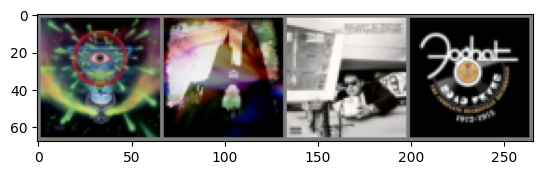

thrash metal nu metal doom metal glam metal


In [39]:
# Display image samples

# Define a reverse mapping from index to class name
reverse_class_mapping = {v: k for k, v in train_dataset.dataset.class_to_idx.items()}

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{reverse_class_mapping[labels[j].item()]:5}' for j in range(len(labels))))

In [55]:
# Define the neural network
'''The neural network architecture consists of two convolutional layers (self.conv1 and self.conv2) 
followed by fully connected layers (self.fc1, self.fc2, self.fc3). 
We define the forward pass in the forward method, specifying how the input data flows through the network.'''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 13 * 13, 2704)
        self.fc2 = nn.Linear(2704, 120)  # Correct input size
        self.fc3 = nn.Linear(120, 84)
        self.fc4 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        #print(x.size())  # Print size after first convolutional layer
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.size())  # Print size after second convolutional layer
        x = x.view(-1, 16 * 13 * 13)
        #print(x.size())  # Print size after reshaping
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net=Net()


In [45]:
# Define loss function and optimizer
'''Cross-entropy loss is commonly used for classification tasks. 
The optimizer is responsible for updating the model's weights during training to minimize the loss, 
and SGD is a popular optimization algorithm for this purpose.'''
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [58]:
# Training the model
epochs = 10
for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # zero the parameter gradients

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = correct / total
    print(f"Epoch {epoch + 1}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}")


Epoch 1, Loss: 4.4474049995857445, Accuracy: 0.0
Epoch 2, Loss: 4.447404998620324, Accuracy: 0.0
Epoch 3, Loss: 4.447404999183486, Accuracy: 0.0
Epoch 4, Loss: 4.4474050001489065, Accuracy: 0.0
Epoch 5, Loss: 4.447404998137614, Accuracy: 0.0
Epoch 6, Loss: 4.447404998378969, Accuracy: 0.0
Epoch 7, Loss: 4.447405001355682, Accuracy: 0.0
Epoch 8, Loss: 4.447404997413549, Accuracy: 0.0
Epoch 9, Loss: 4.447405003527877, Accuracy: 0.0
Epoch 10, Loss: 4.447404998539873, Accuracy: 0.0


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 13 * 13, 120)
        self.dropout1 = nn.Dropout(0.5)  # Dropout with a probability of 0.5
        self.fc2 = nn.Linear(120, 84)
        self.dropout2 = nn.Dropout(0.5)  # Dropout with a probability of 0.5
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 13 * 13)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)  # Apply dropout after the first fully connected layer
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)  # Apply dropout after the second fully connected layer
        x = self.fc3(x)
        return x
dropout_net = Net()

In [59]:
# Training the model
epochs = 10
for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # zero the parameter gradients

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = correct / total
    print(f"Epoch {epoch + 1}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}")

Epoch 1, Loss: 4.447404994436837, Accuracy: 0.0
Epoch 2, Loss: 4.447404997735355, Accuracy: 0.0


KeyboardInterrupt: 

In [57]:
# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on the test set: {(100 * correct / total):.2f}%")

Accuracy on the test set: 0.00%
